# <font color='CC3D3D'> Clustering User Spec 
    
### 1. Kmeans
    user_spec의 numeric featuresf를 사용해 kmeans 방법을 사용하여 고객 군집화를 진행함.
    Elbow point, Silhouette score를 복합적으로 사용해 군집의 개수를 5개로 정함.
    
### 2. 시각화
    umap.plot을 통해 군집이 잘 생성되었는지 확인함.

# Import

In [6]:
import pandas as pd 
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns

# Data Load

In [7]:
train = pd.read_csv('../Data/master_train_data_cluster.csv')
public = pd.read_csv('../Data/master_public_data_cluster.csv')
test = pd.read_csv('../Data/master_test_data_cluster.csv')
private = pd.read_csv('../Data/master_private_data_cluster.csv')

In [8]:
df = pd.concat([train,public,test,private])

In [9]:
df = df[['user_id','credit_score','yearly_income','desired_amount',
         'existing_loan_cnt','existing_loan_amt','enter_birth','age']]

In [10]:
user_df = df.groupby(['user_id']).mean()

# Scailing

In [11]:
scaler = StandardScaler()
user_df_scaled = scaler.fit_transform(user_df)

user_df_scaled = pd.DataFrame(user_df_scaled)
user_df_scaled['user_id'] = user_df.index

user_df_scaled = user_df_scaled.set_index('user_id')

user_df_scaled

,0,1,2,3,4,5,6
user_id,,,,,,,
9.0,0.955487,-0.142897,-0.143834,-0.938315,-0.647206,-0.948004,-1.257416
11.0,-0.240871,-0.160886,-0.111073,-0.938315,-0.689413,-1.136487,-1.347417
14.0,-0.701860,-0.159532,-0.071219,0.041964,-0.098514,1.784990,1.532615
17.0,-1.259779,0.031762,-0.181594,0.653197,-0.318435,-0.759522,-0.987413
19.0,1.267265,-0.384094,-0.119629,0.791589,-0.467271,-0.194075,-0.447407
...,...,...,...,...,...,...,...
879692.0,0.791393,-0.018140,-0.093488,-0.361680,-0.611663,-0.665281,-0.897412
879693.0,-0.101277,-0.184483,-0.200764,-0.361680,-0.667199,-1.513451,-1.707421
879695.0,-0.176760,-0.134580,-0.143834,-0.765324,-0.411735,-0.948004,-1.257416


# Kmeans

In [12]:
clusterer = KMeans(n_clusters=5, random_state=0).fit(user_df_scaled)
cluster_labels = clusterer.labels_

user_df_scaled['cluster'] = cluster_labels

In [13]:
user_df_scaled

,0,1,2,3,4,5,6,cluster
user_id,,,,,,,,
9.0,0.955487,-0.142897,-0.143834,-0.938315,-0.647206,-0.948004,-1.257416,2
11.0,-0.240871,-0.160886,-0.111073,-0.938315,-0.689413,-1.136487,-1.347417,2
14.0,-0.701860,-0.159532,-0.071219,0.041964,-0.098514,1.784990,1.532615,1
17.0,-1.259779,0.031762,-0.181594,0.653197,-0.318435,-0.759522,-0.987413,2
19.0,1.267265,-0.384094,-0.119629,0.791589,-0.467271,-0.194075,-0.447407,0
...,...,...,...,...,...,...,...,...
879692.0,0.791393,-0.018140,-0.093488,-0.361680,-0.611663,-0.665281,-0.897412,2
879693.0,-0.101277,-0.184483,-0.200764,-0.361680,-0.667199,-1.513451,-1.707421,2
879695.0,-0.176760,-0.134580,-0.143834,-0.765324,-0.411735,-0.948004,-1.257416,2


In [14]:
user_spec_cluster = user_df_scaled[['cluster']]
user_spec_cluster

,cluster
user_id,
9.0,2
11.0,2
14.0,1
17.0,2
19.0,0
...,...
879692.0,2
879693.0,2
879695.0,2


In [15]:
user_spec_cluster.value_counts()

cluster
2          153816
1           99144
0           64048
4             296
3             163
dtype: int64

In [10]:
user_spec_cluster.to_csv('../Data/user_spec_cluster.csv')

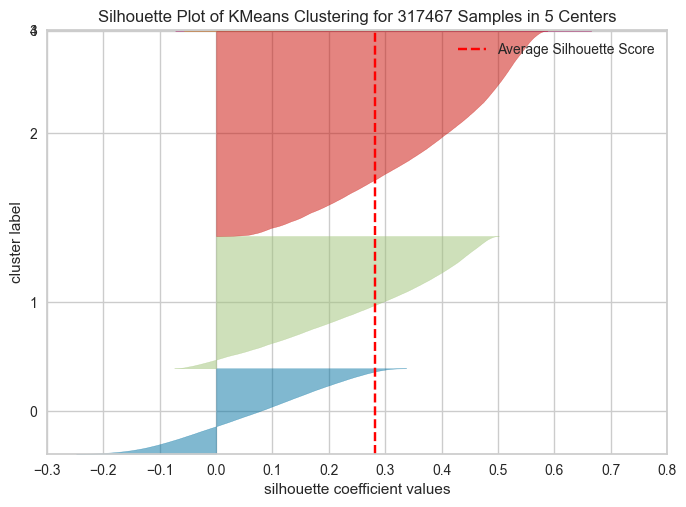

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 317467 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [18]:
#visualizer 생성
visualizer_5 = SilhouetteVisualizer(clusterer, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
visualizer_5.fit(user_df_scaled.iloc[:,:7])      
visualizer_5.show()

# plot

In [20]:
import umap.umap_ as umap
import umap.plot  # pip install umap-learn[plot]

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

In [21]:
import pandas as pd

In [22]:
user_df_scaled['cluster'].value_counts()/len(user_df_scaled)

2    0.484510
1    0.312297
0    0.201747
4    0.000932
3    0.000513
Name: cluster, dtype: float64

In [23]:
x = user_df_scaled.iloc[:,:7]
y = user_df_scaled.iloc[:,7]

In [24]:
%%time

manifold = umap.UMAP().fit(x, y)

CPU times: total: 15min 40s
Wall time: 3min 27s


<AxesSubplot: >

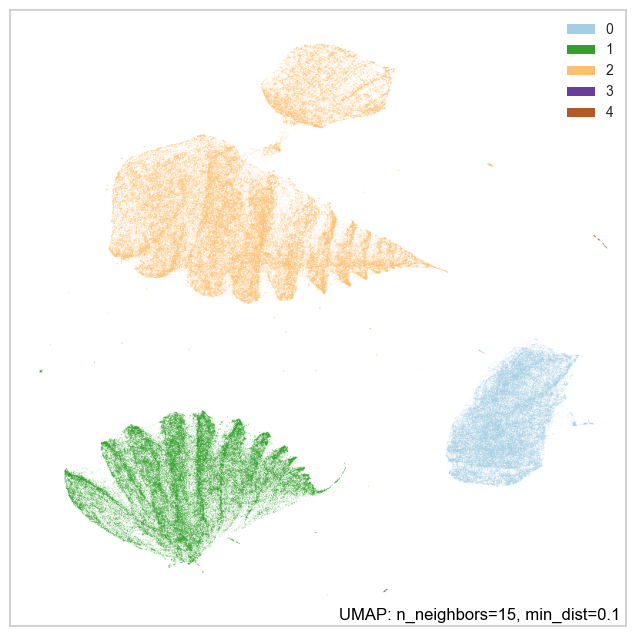

In [26]:
umap.plot.points(manifold, labels=y, color_key_cmap='Paired', background='white')